In [12]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect


In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
inspector=inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [9]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
columns=inspector.get_columns('measurement')
for col in columns:
    print(col['name'], col['type'])
#columns
results=[]
results=session.query(Measurement).filter(extract("month", Measurement.date)==6).all()
results

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


 ...]

In [11]:
#  3. Convert the June temperatures to a list.
june_temps_list= [temp.tobs for temp in results]
june_temps_list

[78.0,
 76.0,
 78.0,
 76.0,
 77.0,
 78.0,
 77.0,
 78.0,
 78.0,
 79.0,
 78.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 77.0,
 77.0,
 82.0,
 78.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 76.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 78.0,
 73.0,
 70.0,
 76.0,
 77.0,
 77.0,
 77.0,
 77.0,
 78.0,
 77.0,
 77.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 75.0,
 76.0,
 76.0,
 77.0,
 78.0,
 76.0,
 77.0,
 75.0,
 77.0,
 76.0,
 76.0,
 75.0,
 77.0,
 77.0,
 76.0,
 78.0,
 77.0,
 76.0,
 77.0,
 76.0,
 76.0,
 77.0,
 77.0,
 78.0,
 77.0,
 77.0,
 77.0,
 76.0,
 75.0,
 76.0,
 76.0,
 77.0,
 76.0,
 73.0,
 73.0,
 75.0,
 77.0,
 76.0,
 77.0,
 79.0,
 78.0,
 79.0,
 78.0,
 78.0,
 79.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 78.0,
 77.0,
 76.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 73.0,
 76.0,
 77.0,
 75.0,
 76.0,
 74.0,
 75.0,
 77.0,
 76.0,
 77.0,
 78.0,
 79.0,
 77.0,
 78.0,
 79.0,
 78.0,
 78.0,
 78.0,
 78.0,
 79.0,
 79.0,
 82.0,
 80.0,
 79.0,
 79.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 73.0,
 75.0,
 75.0,
 76.0,
 84.0,
 79.0,
 76.0,
 79.0,

In [15]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temp_df=pd.DataFrame(june_temps_list, columns=["June Temps"])
june_temp_df

,June Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


In [16]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [22]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temp=session.query(Measurement).filter(extract("month", Measurement.date)==12).all()
dec_temp

 ...]

In [26]:
# 7. Convert the December temperatures to a list.
dec_temps_list= [temp.tobs for temp in dec_temp]
dec_temps_list

[76.0,
 74.0,
 74.0,
 64.0,
 64.0,
 67.0,
 77.0,
 66.0,
 69.0,
 68.0,
 68.0,
 71.0,
 74.0,
 67.0,
 66.0,
 69.0,
 71.0,
 70.0,
 70.0,
 74.0,
 74.0,
 71.0,
 75.0,
 75.0,
 72.0,
 69.0,
 68.0,
 73.0,
 74.0,
 73.0,
 73.0,
 73.0,
 73.0,
 71.0,
 73.0,
 73.0,
 77.0,
 72.0,
 71.0,
 73.0,
 70.0,
 73.0,
 69.0,
 74.0,
 72.0,
 71.0,
 72.0,
 72.0,
 70.0,
 73.0,
 73.0,
 72.0,
 73.0,
 73.0,
 72.0,
 63.0,
 65.0,
 71.0,
 76.0,
 70.0,
 76.0,
 69.0,
 69.0,
 69.0,
 74.0,
 76.0,
 74.0,
 73.0,
 73.0,
 74.0,
 73.0,
 73.0,
 73.0,
 74.0,
 74.0,
 71.0,
 73.0,
 72.0,
 64.0,
 66.0,
 73.0,
 72.0,
 65.0,
 64.0,
 69.0,
 68.0,
 77.0,
 71.0,
 71.0,
 69.0,
 68.0,
 68.0,
 69.0,
 70.0,
 72.0,
 76.0,
 75.0,
 69.0,
 71.0,
 71.0,
 71.0,
 68.0,
 65.0,
 70.0,
 69.0,
 69.0,
 71.0,
 67.0,
 73.0,
 74.0,
 73.0,
 67.0,
 74.0,
 75.0,
 75.0,
 74.0,
 67.0,
 73.0,
 73.0,
 71.0,
 72.0,
 71.0,
 68.0,
 65.0,
 69.0,
 70.0,
 70.0,
 74.0,
 71.0,
 74.0,
 73.0,
 72.0,
 74.0,
 72.0,
 74.0,
 75.0,
 74.0,
 70.0,
 74.0,
 70.0,
 66.0,
 61.0,
 63.0,

In [27]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temp_df=pd.DataFrame(dec_temps_list, columns=["Dec Temps"])
dec_temp_df

,Dec Temps
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0
...,...
1512,71.0
1513,71.0
1514,69.0
1515,65.0


In [28]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temp_df.describe()

,Dec Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [29]:
#filter percipitation from measurement table
june_rain=session.query(Measurement).filter(extract("month", Measurement.date)==6).all()

In [30]:
#June Rain list
june_rain_list= [rain.prcp for rain in june_rain]
june_rain_list

[0.0,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.02,
 0.0,
 0.0,
 0.0,
 0.0,
 0.07,
 0.0,
 0.56,
 0.89,
 0.0,
 0.0,
 0.0,
 0.03,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.05,
 0.06,
 0.07,
 None,
 0.0,
 0.0,
 0.01,
 0.01,
 0.0,
 0.02,
 0.02,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 None,
 None,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.03,
 0.15,
 0.01,
 0.0,
 0.05,
 0.0,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.37,
 0.0,
 0.0,
 0.0,
 0.01,
 0.0,
 0.04,
 0.12,
 0.04,
 0.02,
 0.35,
 0.03,
 0.01,
 0.0,
 0.0,
 0.03,
 0.01,
 0.0,
 0.66,
 0.01,
 0.0,
 0.0,
 0.0,
 0.03,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01,
 0.0,
 0.03,
 0.15,
 0.01,
 0.07,
 0.01,
 0.01,
 0.19,
 0.0,
 0.05,
 0.06,
 0.04,
 0.0,
 0.01,
 0.02,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.

In [31]:
#June Rain DF
june_rain_df=pd.DataFrame(june_rain_list, columns=["June Percipitation"])
june_rain_df

,June Percipitation
0,0.00
1,0.01
2,0.00
3,0.00
4,0.00
...,...
1695,0.02
1696,0.10
1697,0.02
1698,0.04


In [32]:
#Summary Statistics on June Rain
june_rain_df.describe()

,June Percipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [33]:
#December Rain information
dec_rain=session.query(Measurement).filter(extract("month", Measurement.date)==12).all()


In [34]:
#dec rain list
dec_rain_list= [rain.prcp for rain in dec_rain]
dec_rain_list

[0.04,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.58,
 0.77,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.4,
 0.0,
 0.0,
 None,
 0.13,
 0.55,
 0.06,
 0.01,
 0.0,
 0.03,
 0.08,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.13,
 0.07,
 0.07,
 0.08,
 0.4,
 0.7,
 0.0,
 0.01,
 0.07,
 0.02,
 0.15,
 0.02,
 0.18,
 0.03,
 0.04,
 0.1,
 0.03,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01,
 0.0,
 0.0,
 0.0,
 0.2,
 0.01,
 None,
 None,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.14,
 0.09,
 0.01,
 0.02,
 0.02,
 0.12,
 0.0,
 0.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.03,
 0.0,
 0.0,
 0.0,
 0.0,
 0.04,
 0.0,
 2.01,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.03,
 0.0,
 0.0,
 0.02,
 0.0,
 0.0,
 1.1,
 0.02,
 0.0,
 0.16,
 0.09,
 0.02,
 0.0,
 0.0,
 0.05,
 0.02,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.02,
 0.15,
 0.09,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.05,
 0.01,
 0.0,
 0.03,
 0.02,
 0.01,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.93,
 0.04,
 0.02,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.05,
 0.0,
 0.0,
 0.06,
 0.02,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [35]:
#Dec rain df
dec_rain_df=pd.DataFrame(dec_rain_list, columns=["Dec Percipitation"])
dec_rain_df

,Dec Percipitation
0,0.04
1,0.00
2,0.00
3,0.00
4,0.00
...,...
1512,0.14
1513,0.14
1514,1.03
1515,2.37


In [36]:
#Summary Stats for Dec Rain
dec_rain_df.describe()

,Dec Percipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


In [37]:
#July rain
july_rain=session.query(Measurement).filter(extract("month", Measurement.date)==7).all()
july_rain_list= [rain.prcp for rain in july_rain]
july_rain_df=pd.DataFrame(july_rain_list, columns=["July Percipitation"])
july_rain_df.describe()

,July Percipitation
count,1569.000000
mean,0.167922
std,0.625977
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,11.530000


In [38]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

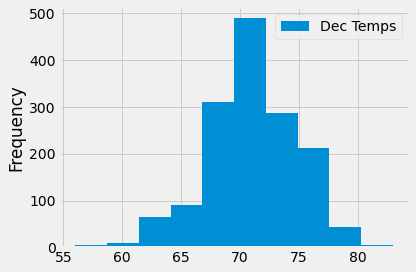

In [42]:
dec_temp_df.plot.hist(bins=10)
plt.tight_layout()


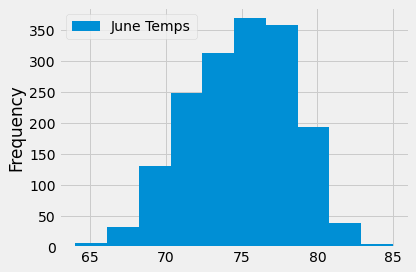

In [43]:
june_temp_df.plot.hist(bins=10)
plt.tight_layout()